In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import collections
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from dataloader import GPCurvesReader, CNPRegressionDescription
from encoder import Encoder, Decoder, CNP


torch.Size([64, 12, 1])
torch.Size([64, 18, 1])
torch.Size([64, 11, 1])
torch.Size([64, 10, 1])
torch.Size([64, 7, 1])
torch.Size([64, 15, 1])
torch.Size([64, 16, 1])
torch.Size([64, 18, 1])
torch.Size([64, 10, 1])
torch.Size([64, 12, 1])
torch.Size([64, 13, 1])
torch.Size([64, 9, 1])
torch.Size([64, 16, 1])
torch.Size([64, 12, 1])
torch.Size([64, 20, 1])
torch.Size([64, 14, 1])
torch.Size([64, 11, 1])
torch.Size([64, 14, 1])
torch.Size([64, 11, 1])
torch.Size([64, 11, 1])
torch.Size([64, 10, 1])
torch.Size([64, 10, 1])
torch.Size([64, 15, 1])
torch.Size([64, 9, 1])
torch.Size([64, 12, 1])
torch.Size([64, 10, 1])
torch.Size([64, 15, 1])
torch.Size([64, 13, 1])
torch.Size([64, 17, 1])
torch.Size([64, 15, 1])
torch.Size([64, 14, 1])
torch.Size([64, 17, 1])
torch.Size([64, 9, 1])
torch.Size([64, 12, 1])
torch.Size([64, 9, 1])
torch.Size([64, 14, 1])
torch.Size([64, 11, 1])
torch.Size([64, 13, 1])
torch.Size([64, 12, 1])
torch.Size([64, 15, 1])
torch.Size([64, 12, 1])
torch.Size([64, 13, 1

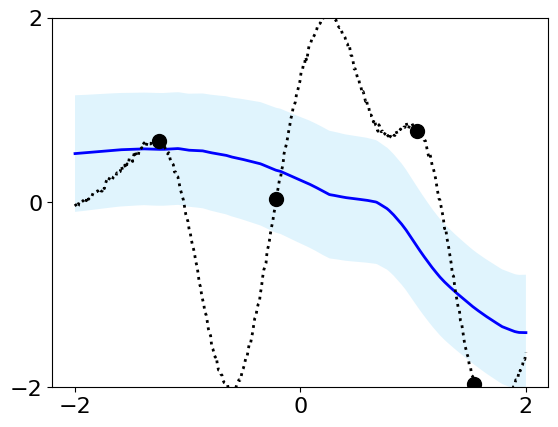

torch.Size([64, 14, 1])
torch.Size([64, 16, 1])
torch.Size([64, 6, 1])
torch.Size([64, 9, 1])
torch.Size([64, 14, 1])
torch.Size([64, 8, 1])
torch.Size([64, 16, 1])
torch.Size([64, 17, 1])
torch.Size([64, 19, 1])
torch.Size([64, 15, 1])
torch.Size([64, 20, 1])
torch.Size([64, 12, 1])
torch.Size([64, 9, 1])
torch.Size([64, 17, 1])
torch.Size([64, 13, 1])
torch.Size([64, 13, 1])
torch.Size([64, 16, 1])
torch.Size([64, 14, 1])
torch.Size([64, 12, 1])
torch.Size([64, 14, 1])
torch.Size([64, 11, 1])
torch.Size([64, 12, 1])
torch.Size([64, 9, 1])
torch.Size([64, 12, 1])
torch.Size([64, 14, 1])
torch.Size([64, 16, 1])
torch.Size([64, 18, 1])
torch.Size([64, 14, 1])
torch.Size([64, 12, 1])
torch.Size([64, 11, 1])
torch.Size([64, 12, 1])
torch.Size([64, 11, 1])
torch.Size([64, 16, 1])
torch.Size([64, 11, 1])
torch.Size([64, 17, 1])
torch.Size([64, 16, 1])
torch.Size([64, 10, 1])
torch.Size([64, 9, 1])
torch.Size([64, 10, 1])
torch.Size([64, 12, 1])
torch.Size([64, 7, 1])
torch.Size([64, 13, 1])

KeyboardInterrupt: 

In [10]:


    dataset_train = GPCurvesReader(
        batch_size=64, max_num_context=10, x_size=1, y_size=1
    )

    dataset_test = GPCurvesReader(
        batch_size=128, max_num_context=20, x_size=1, y_size=1, testing=True
    )

    d_x, d_in, representation_size, d_out = 1, 2, 128, 2
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = CNP().to(device)
    optimizer = optim.Adam(model.parameters(), lr=3e-4)

    for epoch in range(100):
            
            model.train()
            total_loss = 0
            for i in range(1000):
                optimizer.zero_grad()
                data = dataset_train.generate_curves()
                (context_x, context_y), target_x = data.query
                target_y = data.target_y
    
                context_x = context_x.to(device)
                context_y = context_y.to(device)
                target_x = target_x.to(device)
                target_y = target_y.to(device)

                dist, mu, sigma = model(context_x, context_y, target_x)

                log_p = dist.log_prob(target_y)
                print(log_p.shape)
                loss = -log_p.mean()
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
            print(f"Epoch: {epoch}, Loss: {total_loss / 1000}")
            model.eval()
            with torch.no_grad():
                data = dataset_test.generate_curves()
                (context_x, context_y), target_x = data.query
                target_y = data.target_y

                context_x = context_x.to(device)
                context_y = context_y.to(device)
                target_x = target_x.to(device)
                target_y = target_y.to(device)
                dist, mu, sigma = model(context_x, context_y, target_x)
                log_p = dist.log_prob(target_y)
                loss = -log_p.mean()
                print(f"Test Loss: {loss.item()}")
                if epoch % 10 != 0:
                    continue 
                # Plotting
                context_x = context_x.cpu().numpy()
                context_y = context_y.cpu().numpy()
                target_x = target_x.cpu().numpy()
                target_y = target_y.cpu().numpy()
                mu = mu.cpu().numpy()
                sigma = sigma.cpu().numpy()
                pred_y, var = mu, sigma
                plt.plot(target_x[0], pred_y[0], "b", linewidth=2)
                plt.plot(target_x[0], target_y[0], "k:", linewidth=2)
                plt.plot(context_x[0], context_y[0], "ko", markersize=10)
                plt.fill_between(
                    target_x[0, :, 0],
                    pred_y[0, :, 0] - var[0, :, 0],
                    pred_y[0, :, 0] + var[0, :, 0],
                    alpha=0.2,
                    facecolor="#65c9f7",
                    interpolate=True,
                )

                # Make the plot pretty
                plt.yticks([-2, 0, 2], fontsize=16)
                plt.xticks([-2, 0, 2], fontsize=16)
                plt.ylim([-2, 2])
                plt.grid(False)
                # ax = plt.gca()
                # ax.set_axis_bgcolor('white')
                plt.show()